# Module 5: Final Project

## 1) Introduction

This final project will focus on doing analysis of agricultural data.  This analysis could be used to build a better predictive model for precision agriculture.  The three broad overall categories of the data are:

1. Climate conditions (temperature, humidity, rainfall)
2. Soil acidity (pH)
3. Fertilizer nutrients (nitrogen, potassium, phosphorous)

This unsupervised learning project will use PCA in conjuction with a K-Means model to extract meaningful insight into the data.

The dataset for the final project can be downloaded from the below link:

https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

The link to the GitHub repository is:

https://github.com/doctorterry/cu-dtsa5510-Final

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 2) Data

We will begin by loading in the data and briefly looking at the details of the dataframe.

In [2]:
# lets read the dataset
data = pd.read_csv("data.csv")

# lets check teh shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## 3) Exploratory Data Analysis (EDA)

Listed below are the individual column names for the dataframe.  The description of each of these column headers comes from the creator of the dataset.

* N - Ratio of Nitrogen content in the soil
* P - Ratio of Phosphorous content in soil
* K - Ration of Potassium content in soil
* Temperature - Air temperature in degrees Celsius
* Humidity - Air relative humidity as a percentage
* pH - Acidity/basicity value of the soil in pH
* Rainfall - The amount of rainfall for this farm in millimeters (mm)

In [5]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Although it appears from the dataframe info that there is no null values, we will confirm this.  Not surpringly, there are no Null or NaN values.

In [6]:
print("Count any \"NULL\" values in the dataset")
print(data.isnull().sum())
print("\nCount any \"NaN\" values in the dataset")
print(data.isna().sum())

Count any "NULL" values in the dataset
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Count any "NaN" values in the dataset
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Now let us check the "label" column.  We want to see what are the types of crops that are being considered in this agricultural dataset.  Note that there is an equal number of each crop in the dataset.

In [7]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Let us quickly examine the data.  We will first look at the overall results for the dataframe.  Secondly, let us look at the minimum, average, and maximum values for each column.

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
for i in range(len(data.columns) - 1):
    print("---------------------------------------------")    
    print(f"Statistics for {data.columns[i]}")
    print(f"Minimum {data.columns[i]} required : {round((data[data.columns[i]].min()), 2)}")
    print(f"Average {data.columns[i]} required : {round((data[data.columns[i]].mean()), 2)}")
    print(f"Maximum {data.columns[i]} required : {round((data[data.columns[i]].max()), 2)}")

---------------------------------------------
Statistics for N
Minimum N required : 0
Average N required : 50.55
Maximum N required : 140
---------------------------------------------
Statistics for P
Minimum P required : 5
Average P required : 53.36
Maximum P required : 145
---------------------------------------------
Statistics for K
Minimum K required : 5
Average K required : 48.15
Maximum K required : 205
---------------------------------------------
Statistics for temperature
Minimum temperature required : 8.83
Average temperature required : 25.62
Maximum temperature required : 43.68
---------------------------------------------
Statistics for humidity
Minimum humidity required : 14.26
Average humidity required : 71.48
Maximum humidity required : 99.98
---------------------------------------------
Statistics for ph
Minimum ph required : 3.5
Average ph required : 6.47
Maximum ph required : 9.94
---------------------------------------------
Statistics for rainfall
Minimum rainfall 

We will now examine the distributions of each of the main topics. Both "pH" and "temperature" have normal distributions in regards to the counts.  For "rainfall", the graph appears to show that it is much more likely to get lower rainfall since the count distribution is greater on the left/lower end of the graph.  Conversely, "humidity" is the opposite.  It is much more likely to get higher humidity values (greater number on the right side of the graph).  For the soil nutrients (N, P, K), they all seem to have a slighlty irregular distribution.  The most "normal" of the three is K.  However, the counts are still skewed to the left side of the count graph.

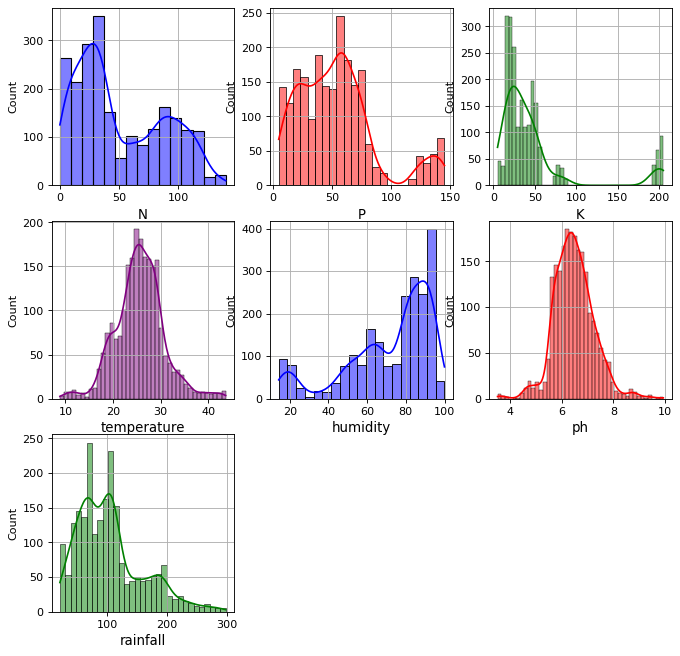

In [10]:
colors = ["blue", "red", "green", "purple", "blue", "red", "green", "purple"]

figure(figsize=(10, 10), dpi=80)

for i in range(len(data.columns) - 1):
    plt.subplot(3, 3, (i + 1))
    sns.histplot(data[data.columns[i]], color = colors[i], kde = True)
    plt.xlabel(f"{data.columns[i]}", fontsize = 12)
    plt.grid()

Below is the correlation matrix for the data.  Below are some insights:

* Only two of the variables (the soil nutrients K and P) are considered highly correlated (positive correlation).
* It is somewhat shocking that rainfall and humidity were not more positively correlated.  Although moderately correlated, temperature and humidity are really only slighly correlated in the positive direction.
* Other than "K" and "P", at most the value of the correlation of all the remaining variables is little more than 0.20. 

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<AxesSubplot:>

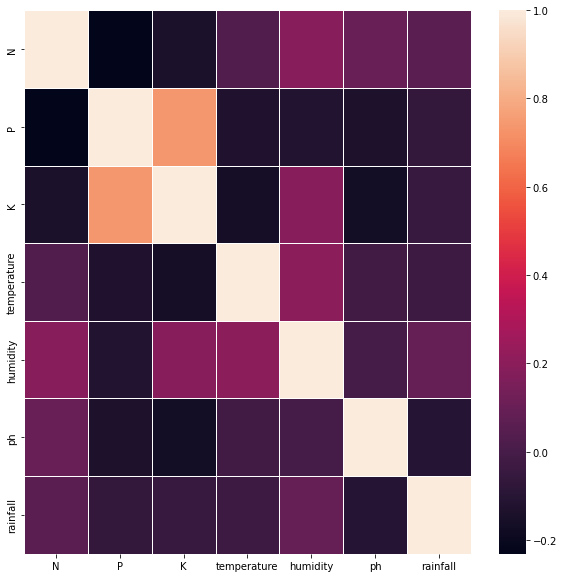

In [11]:
corr = data.corr()

print(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=1)

Let us examine the mean values for each of the individual crops.  Note that we will re-visit this data later when analyzing the cluster results.

In [12]:
conditions = ['N','P','K','temperature','ph','humidity','rainfall']
for i in (data["label"].unique()):
    print(f"Mean values for {i}")
    print((data[(data['label'] == i)][conditions].mean()))
    print("\n")

Mean values for rice
N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
ph               6.425471
humidity        82.272822
rainfall       236.181114
dtype: float64


Mean values for maize
N              77.760000
P              48.440000
K              19.790000
temperature    22.389204
ph              6.245190
humidity       65.092249
rainfall       84.766988
dtype: float64


Mean values for chickpea
N              40.090000
P              67.790000
K              79.920000
temperature    18.872847
ph              7.336957
humidity       16.860439
rainfall       80.058977
dtype: float64


Mean values for kidneybeans
N               20.750000
P               67.540000
K               20.050000
temperature     20.115085
ph               5.749411
humidity        21.605357
rainfall       105.919778
dtype: float64


Mean values for pigeonpeas
N               20.730000
P               67.730000
K               20.290000
temperature     2

## 4) Build Model

We will now begin to build our model.  First we will create our X dataset, removing the labels.

In [13]:
X = data.copy()
X.drop(["label"], axis = 1, inplace = True)
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


We will now determine the optimum number of clusters for this dataset.  To do this, we will use the "Elbow Method".  In this method, we are actually varying the number of clusters (k) from 1 to 11 (for a total of 10). For each value of k, we are calculating WCSS (Within-Cluster Sum of Square).  WCSS is the sum of squared distance between each point and the centroid in a cluster.  

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

F:\Dev\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


When we plot the WCSS with the K value, the plot looks like an elbow.  As the number of clusters increases, the WCSS value will start to decrease.  WCSS value is largest when k = 1.  When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.  From this point, the graph starts to move almost parallel to the X-axis.  The k value corresponding to this point is the optimal k value or an optimal number of clusters.

For this model, the optimum value of k is 4.

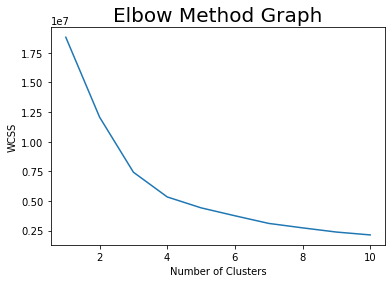

In [15]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method Graph", fontsize = 20)
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

Now we will lower the dimensionality of the data to 2 dimensions.  This will help later with plotting the results.  Note that I ran this both with and without using the standard scaler.  The results did not vary at all (likely since the ranges of each element are fairly similar).

In [16]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(X)

#pca = PCA(n_components = 2).fit_transform(X)
pca = PCA(n_components = 2, random_state = 42).fit_transform(standardized_features)

We will now implement the K-Means algorithm.  Since we determined from the Elbow method that the optimum clusters is 4, this will be used in the implementation of the model.

In [17]:
n_clusters = 4
kmeans = KMeans(n_clusters= n_clusters, random_state = 42)
y_hat = kmeans.fit_predict(pca)

We will now examine the results of the K-Means clustering.  First, we create a dataframe from the original data that is just the original labels (ie plant names).

In [18]:
y = data['label']
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

 Let us convert the results of the K-Means fit and predict function into a Pandas dataframe.

In [19]:
y_means = pd.DataFrame(y_hat)
y_means

,0
0,2
1,2
2,2
3,2
4,2
...,...
2195,2
2196,2
2197,2
2198,2


We will now concatenate the two dataframes so that we can associate the labels to the datapoints in the actual clusters.  This will enable us to see the results of the K-Means clustering.

In [20]:
z = pd.concat([y_means, y], axis = 1)
z = z.rename(columns = {0: 'cluster'})
z

,cluster,label
0,2,rice
1,2,rice
2,2,rice
3,2,rice
4,2,rice
...,...,...
2195,2,coffee
2196,2,coffee
2197,2,coffee
2198,2,coffee


## 5) Results

Listed below are the plants associated with each individual cluster.  Note the below observations:

* There is some overlap between clusters 0, 2 and 3.  "Maize", "pigeonpeas", "mungbean", "blackgram", "pomegranate", "mango", "organge", "papaya", "jute" and "coffee" appear in clusters 0 and 2.  "Pigeonpeas", "mothbeans" and "lentil" appear in clusters 0 and 3.  Only "pigeonpeas" overlaps with clusters 2 and 3. 
* The plants in cluster 1 ("grapes", "apple") do not have any overlap.

In [21]:
for i in range(n_clusters):
    print(f"Crops in Cluster {i}:") 
    print(f"{z[z['cluster'] == i]['label'].unique()}")
    print("\n")

Crops in Cluster 0:
['maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'mango' 'orange' 'papaya' 'cotton' 'jute' 'coffee']


Crops in Cluster 1:
['grapes' 'apple']


Crops in Cluster 2:
['rice' 'maize' 'pigeonpeas' 'mungbean' 'blackgram' 'pomegranate' 'banana'
 'mango' 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Crops in Cluster 3:
['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'lentil']




Plotting the clusters gives us further insight into the previous observations.  We can clearly see that clusters 0, 2 and 3 are quite close together.  Cluster 1 is a significant outlier to the rest of the data.

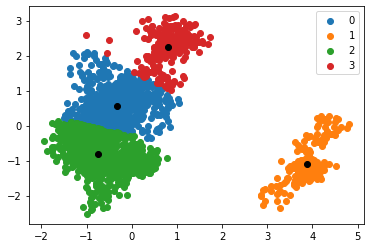

In [22]:
# Getting unique labels
u_labels = np.unique(y_hat)
centroids = kmeans.cluster_centers_

# Plot the results
for i in u_labels:
    plt.scatter(x = pca[y_hat == i , 0] , y = pca[y_hat == i , 1] , label = i)
for j in range(len(centroids)):
    plt.scatter(x = centroids[j, 0], y = centroids[j, 1], c = "black")
plt.legend()
plt.show()

Before we attempt to determine why cluster 1 is significantly different, let us clean up the clusters so that there are no overlaps.  To do this, we will only consider a plant a member of a cluster if there are 50 or more instances.  Notice now that cluster 3 only has two crops.

In [23]:
for i in range(n_clusters):
    counts = z[z['cluster'] == i]['label'].value_counts()    
    d = z.loc[z['label'].isin(counts.index[counts >= 50])]
    d = d['label'].value_counts()
    print(f"Crops in Cluster {i}:") 
    print(f"{list(d.index)}")
    print("\n")

Crops in Cluster 0:
['maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']


Crops in Cluster 1:
['grapes', 'apple']


Crops in Cluster 2:
['rice', 'banana', 'watermelon', 'muskmelon', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


Crops in Cluster 3:
['chickpea', 'kidneybeans']




Let us quickly visualize the impact of different conditions on each individual crop.  It is the same info that we looked at in detail during the exploratory data analysis.  This is simply a quick visual to help in the next few steps.  

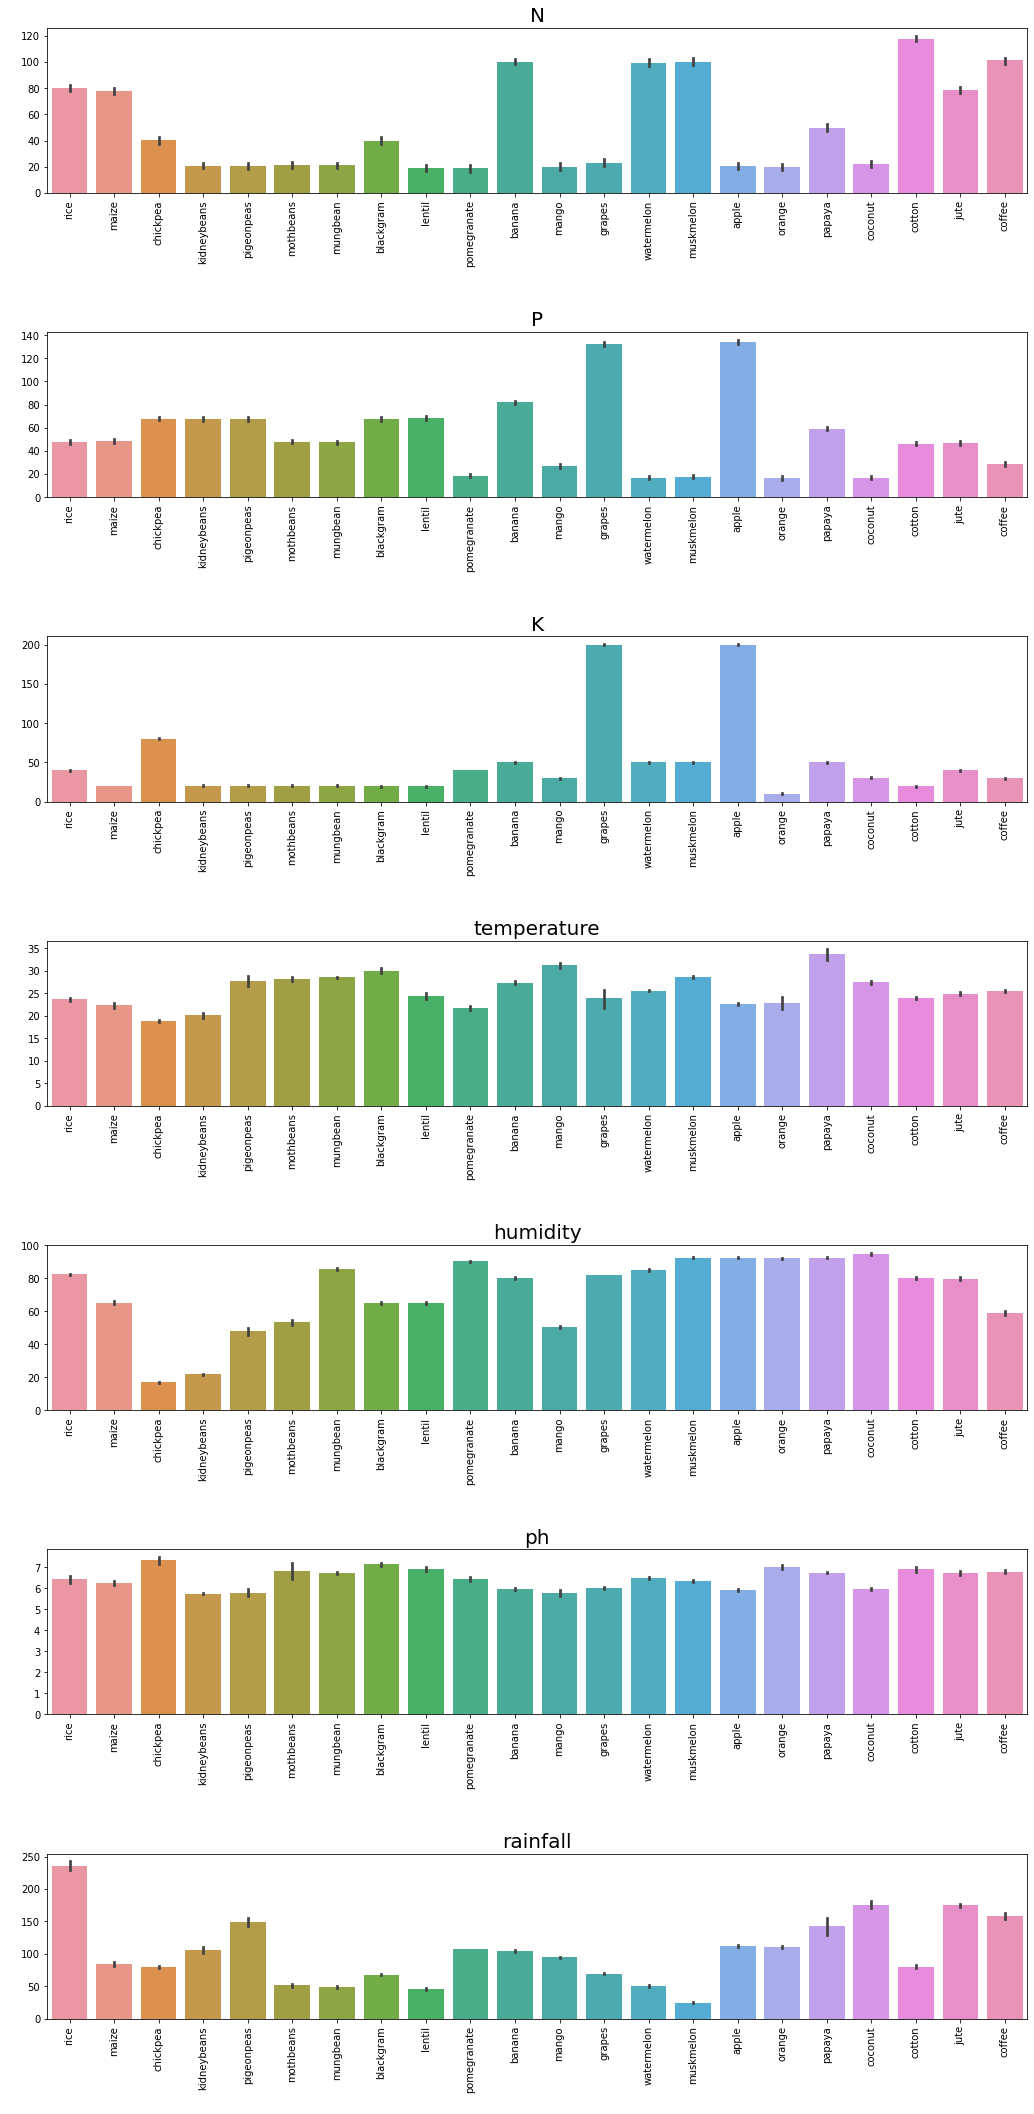

In [24]:
plt.rcParams['figure.figsize'] = (15, 30)

for i in range(len(data.columns) - 1):
    plt.subplot(7, 1, (i + 1))
    sns.barplot(y = data[data.columns[i]], x = data['label'])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.title(data.columns[i], fontsize = 20)
    plt.xticks(fontsize = 10, rotation=90)
    plt.tight_layout(pad= 3)
plt.show()

We will now look at the agricultural factors in a little more detail.  We will begin by analyzing the fertilizer nutrients (nitrogen, potassium, phosphorous) in the soil.  The first observation, important to our cluster analysis, jumps out:

* Apples and grapes are the only two crops that need high concentrations of phosphorous (P) and potassium (K).  This is a drastic difference in relation to all other crops in this dataset.
* Most if not all the other crops show varying levels of the three elements to grow properly.

In [25]:
print("** NITROGEN (N) **\n")
print("Crops which will grow with a high ratio of Nitrogen (N) in the soil (greater or equal to 120):")
print(f"{data[data['N'] >= 120]['label'].unique()}")
print("\n")
print("Crops which will grow with a moderate ratio of Nitrogen (N) in the soil (between 120 and 20):")
print(f"{data[(data['N'] > 20) & (data['N'] < 120)]['label'].unique()}")
print("\n")
print("Crops which will grow with a low ratio of Nitrogen (N) in the soil (less or equal to 20):")
print(f"{data[data['N'] <= 20]['label'].unique()}")
print("\n----------------------------------------------------------------------\n")
print("** PHOSPHOROUS (P) **\n")
print("Crops which will grow with a high ratio of Phosphorous (P) in the soil (greater or equal to 100):")
print(f"{data[data['P'] >= 100]['label'].unique()}")
print("\n")
print("Crops which will grow with a moderate ratio of Phosphorous (P) in the soil (between 100 and 20):")
print(f"{data[(data['P'] > 20) & (data['P'] < 100)]['label'].unique()}")
print("\n")
print("Crops which will grow with a low ratio of Phosphorous (P) in the soil (less or equal to 20):")
print(f"{data[data['P'] <= 20]['label'].unique()}")
print("\n----------------------------------------------------------------------\n")
print("** POTASSIUM (K) **\n")
print("Crops which will grow with a very high ratio of Potassium (K) in the soil (greater or equal to 200):")
print(f"{data[data['K'] >= 200]['label'].unique()}")
print("\n")
print("Crops which will grow with a moderate ratio of Potassium (K) in the soil (between 200 and 20):")
print(f"{data[(data['K'] > 20) & (data['K'] < 200)]['label'].unique()}")
print("\n")
print("Crops which will grow with a low ratio of Potassium (K) in the soil (less or equal to 20):")
print(f"{data[data['K'] <= 20]['label'].unique()}")

** NITROGEN (N) **

Crops which will grow with a high ratio of Nitrogen (N) in the soil (greater or equal to 120):
['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']


Crops which will grow with a moderate ratio of Nitrogen (N) in the soil (between 120 and 20):
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Crops which will grow with a low ratio of Nitrogen (N) in the soil (less or equal to 20):
['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'coconut']

----------------------------------------------------------------------

** PHOSPHOROUS (P) **

Crops which will grow with a high ratio of Phosphorous (P) in the soil (greater or equal to 100):
['grapes' 'apple']


Crops which will grow with a moderate ratio of Phosphorou

We will now examine the climate conditions (rainfall, temperature, humidity):

* As observed in the bar plot, rice can grow in a climate with by far the most rainfall.  This is definitely not surprising since rice grows in shallow water (ie freshwater marshes).
* Grapes can grow in the greatest temperature range (from below 10C to above 40C).
* Many crops can grow in a high humidity environment.  However, it is preferable to grow chickpeas in a low humidity environment only.

In [26]:
print("** RAINFALL **\n")
print("Crops which need high rainfall (greater or equal to 200mm):")
print(f"{data[data['rainfall'] >= 200]['label'].unique()}")
print("\n")
print("Crops which will grow with a moderate rainfall (between 200 and 40mm):")
print(f"{data[(data['rainfall'] > 40) & (data['rainfall'] < 200)]['label'].unique()}")
print("\n")
print("Crops which will grow with low rainfall (less or equal to 40mm):")
print(f"{data[data['rainfall'] <= 40]['label'].unique()}")
print("\n----------------------------------------------------------------------\n")
print("** TEMPERATURE **\n")
print("Crops which grow at high outdoor temperature (greater or equal to 40C):")
print(f"{data[data['temperature'] >= 40]['label'].unique()}")
print("\n")
print("Crops which will grow with at a moderate outdoor temperature (between 40 and 20C):")
print(f"{data[(data['temperature'] > 10) & (data['temperature'] < 40)]['label'].unique()}")
print("\n")
print("Crops which grow at low outdoor temperature (less or equal to 10C):")
print(f"{data[data['temperature'] <= 10]['label'].unique()}")
print("\n----------------------------------------------------------------------\n")
print("** HUMIDITY **\n")
print("Crops which grow in high humidity (greater or equal to 80%):")
print(f"{data[data['humidity'] >= 80]['label'].unique()}")
print("\n")
print("Crops which will grow in moderate humidity (between 80 and 20%):")
print(f"{data[(data['humidity'] > 20) & (data['humidity'] < 80)]['label'].unique()}")
print("\n")
print("Crops which grow in low humidity (less or equal to 20%):")
print(f"{data[data['humidity'] <= 20]['label'].unique()}")

** RAINFALL **

Crops which need high rainfall (greater or equal to 200mm):
['rice' 'papaya' 'coconut']


Crops which will grow with a moderate rainfall (between 200 and 40mm):
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


Crops which will grow with low rainfall (less or equal to 40mm):
['mothbeans' 'mungbean' 'lentil' 'muskmelon']

----------------------------------------------------------------------

** TEMPERATURE **

Crops which grow at high outdoor temperature (greater or equal to 40C):
['grapes' 'papaya']


Crops which will grow with at a moderate outdoor temperature (between 40 and 20C):
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee'

Finally, we will examine the results of soil acidity (pH):

* Mothbeans appear to be able to grow with any level of soil pH.
* The remaining crops should be grown in soil with a pH between 4 and 9 for the best results.

In [27]:
print("** pH **\n")
print("Crops which will grow in high pH soil (a pH greater or equal to 9):")
print(f"{data[data['ph'] >= 9]['label'].unique()}")
print("\n")
print("Crops which will grow in moderate pH soil (a pH between 9 and 4):")
print(f"{data[(data['ph'] > 4) & (data['ph'] < 9)]['label'].unique()}")
print("\n")
print("Crops which will grow in low pH soil (a pH less or equal to 4):")
print(f"{data[data['ph'] <= 4]['label'].unique()}")

** pH **

Crops which will grow in high pH soil (a pH greater or equal to 9):
['mothbeans']


Crops which will grow in moderate pH soil (a pH between 9 and 4):
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Crops which will grow in low pH soil (a pH less or equal to 4):
['mothbeans']


It appears from the brief analysis of the data that the need for high concentrations of potassium (K) and phosphorous (P) are the likely reason that cluster 1 (apples, grapes) is a significant outlier.  

## 6) Conclusion

How would this analysis be useful?  Starting with crop selection, knowing what crops will grow best on a particular piece of agricultural land is quite important.  But much of this is information is already known in a sense, possibly even for centuries.  Humans have been growing specific crops in specific climates since ancient times.  

Where this becomes extremely useful is in regards to environmental impact and cost reductions.  Specifically in regards to fertilizer.  Knowing which crops will work on land while minimizing fertilizer use can defitely improve profits.  Additionally, fertilizers can be quite harmful to the environment, especially is they leach into the ground water.  Minimizing the use will drastically improve the negative environmental impact.

Using this data, we could build a much improved supervised learning model (ie using logistic regression for example).  This could be used to build a simple application for small farms to select the ideal crops.  

However, although good to learn with, this dataset has its limitations.  As with any ecosystem, there are a great many more factors that will impact the environment, in this case soil fertility.  Fertilizer nutrients seemed to be an odd inclusion into this dataset.  This data could easily vary depending on the size of the farm and how quickly fertilizer can be changed.  Also, type of soil (sandy, silt, clay, loamy) is very important in agriculture.  There are likely many more factors that an expert with specialized knowledge would include in the dataset.